In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
openCloseData=pd.read_csv("openCloseData9.csv")
openCloseData.head()

,Unnamed: 0,AboutMe,Body,Comment,Downvotes,Location,PostId,ProfileImageUrl,Reputation,SOUrlCount,...,sentencesStartWithICount,sentencesStartWithYouCount,shortWordCount,smogIndex,tagCount,tagWeightSum,titleLengthInChars,urlCount,userProfileFilled,websiteUrlFilled
0,0,NaN,<p>Please someone explain complete step by ste...,100,0,NaN,32203002,https://lh4.googleusercontent.com/-_GtduZ_HroM...,6,0,...,0,0,6,0.0,2,-110.462467,33,0,1,0
1,1,NaN,<p>I've used SFST language for my project on N...,100,0,NaN,31961877,https://lh4.googleusercontent.com/-_GtduZ_HroM...,6,0,...,3,0,27,0.0,4,-157.135019,25,2,1,0
2,2,<p>Currently a software developer at HiQ Finla...,<p>The following JSON is returned from SharePo...,100,2413,"Helsinki, Finland",22080350,https://i.stack.imgur.com/w2whQ.png,33857,0,...,0,0,25,0.0,3,-279.862500,134,0,4,1
3,3,<p>Love the computer science &amp; technology ...,<p>What's the benifit of allocating a chunk of...,100,3,中国Shanghai Shi,28019349,https://www.gravatar.com/avatar/a33ac21cad99e5...,1470,0,...,0,0,10,0.0,5,-234.970000,78,0,3,0
4,4,NaN,<p>I'm using an S3 bucket as the origin or a C...,100,77,NaN,32211159,NaN,10992,0,...,2,0,35,10.7,4,-527.002535,59,0,0,0


In [3]:
print(openCloseData.shape)
openCloseData.drop(['Unnamed: 0'],inplace=True,axis=1)
print(openCloseData.shape)

(159996, 47)
(159996, 46)


In [4]:
openCloseData.columns

Index(['AboutMe', 'Body', 'Comment', 'Downvotes', 'Location', 'PostId',
       'ProfileImageUrl', 'Reputation', 'SOUrlCount', 'Tags', 'Title',
       'Unnamed: 0.1', 'Upvotes', 'UserId', 'Views', 'WebsiteUrl',
       'aboutMeFilled', 'bodyWordCount', 'closed', 'codeLength',
       'colemanLiauIndex', 'countOfInterrogativeSent',
       'daleChallReadabilityScore', 'experienceInTime', 'firstLineLength',
       'fleschReadingEase', 'gunningFog', 'locationFilled', 'lowerUpperRatio',
       'numAns', 'numPR', 'numPeopleReached', 'numQues',
       'profileImageUrlFilled', 'punctuationCount', 'sentenceCount',
       'sentencesStartWithICount', 'sentencesStartWithYouCount',
       'shortWordCount', 'smogIndex', 'tagCount', 'tagWeightSum',
       'titleLengthInChars', 'urlCount', 'userProfileFilled',
       'websiteUrlFilled'],
      dtype='object')

In [5]:
# closeData = openCloseData[80001:]
closeData = openCloseData[openCloseData['closed'] == 1]
closeData.shape

(79996, 46)

In [6]:
X = closeData.loc[:,['Comment', 'Reputation',
       'experienceInTime', 'Views',
       'Upvotes', 'Downvotes', 'tagCount',
       'lowerUpperRatio', 'sentenceCount', 'firstLineLength', 'codeLength',
       'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'gunningFog',
       'fleschReadingEase', 'daleChallReadabilityScore', 'smogIndex',
       'colemanLiauIndex', 'userProfileFilled', 'numAns', 'numQues'] ]
X.replace(np.nan,0,inplace=True)  #replacing NaN to 0
X.lowerUpperRatio.replace(np.inf,0,inplace=True)  #replacing infinity to 0
print(X.shape)
print(type(X))

(79996, 28)
<class 'pandas.core.frame.DataFrame'>


In [7]:
X.head()

,Comment,Reputation,experienceInTime,Views,Upvotes,Downvotes,tagCount,lowerUpperRatio,sentenceCount,firstLineLength,...,bodyWordCount,punctuationCount,gunningFog,fleschReadingEase,daleChallReadabilityScore,smogIndex,colemanLiauIndex,userProfileFilled,numAns,numQues
80000,102,17527,1953,2765,2005,119,4,26.153846,6,69,...,168,50,71.70,-80.10,13.96,0.0,9.83,2,583,209
80001,102,151,1425,32,16,0,5,16.448276,10,75,...,113,19,52.99,-26.31,12.32,0.0,11.98,0,0,0
80002,102,1639,900,208,75,1,3,18.916667,4,79,...,47,17,17.06,64.54,7.83,0.0,14.97,3,20,13
80003,102,2669,620,658,282,11,2,12.272727,5,210,...,94,45,26.89,32.23,9.16,0.0,17.02,4,43,70
80004,105,2669,369,658,282,11,2,32.714286,10,35,...,104,128,20.32,53.58,7.94,11.9,15.97,4,43,70


In [8]:
X.reset_index(inplace = True)
X.drop(['index'],inplace=True,axis=1)

In [9]:
y = X['Comment'] - 102
X.drop(['Comment'],inplace=True,axis=1)
print(X.shape, y.shape)
print(X.columns)

(79996, 27) (79996,)
Index(['Reputation', 'experienceInTime', 'Views', 'Upvotes', 'Downvotes',
       'tagCount', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'gunningFog', 'fleschReadingEase',
       'daleChallReadabilityScore', 'smogIndex', 'colemanLiauIndex',
       'userProfileFilled', 'numAns', 'numQues'],
      dtype='object')


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
print(type(X))
X = pd.DataFrame(X, columns=['Reputation', 'experienceInTime', 'Views',
       'Upvotes', 'Downvotes', 'tagCount', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength', 'codeLength',
       'urlCount', 'SOUrlCount', 'titleLengthInChars', 'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount', 'punctuationCount', 'gunningFog',
       'fleschReadingEase', 'daleChallReadabilityScore', 'smogIndex', 'colemanLiauIndex', 'userProfileFilled',
                             'numAns', 'numQues'])

<class 'numpy.ndarray'>


In [26]:
print(scaler.mean_)
print(scaler.var_)

[  2.35523230e+03   4.34132119e+02   3.40874919e+02   2.26129319e+02
   2.12335492e+01   2.79326466e+00   3.14914157e+01   5.35521776e+00
   1.00150008e+02   3.59061591e+02   2.09772989e-01   2.95014751e-02
   4.99136832e+01   1.21304815e+00   9.32546627e-03   1.79547727e+00
   3.77248362e+01   7.93895445e+01   7.07764763e+01   2.13824006e+01
   5.07359859e+01   7.99246512e+00   4.25646657e+00   1.13319457e+01
   1.53087654e+00   3.23774189e+01   4.55576904e+01]
[  1.66741102e+08   3.23248073e+05   3.99683595e+06   5.91791687e+05
   1.47856693e+05   1.51101319e+00   7.36299857e+02   5.71612347e+01
   1.24934731e+04   1.48916971e+06   6.45592273e-01   5.61825156e-02
   4.11095792e+02   2.71061078e+00   1.26386720e-02   2.59538982e+00
   1.17190623e+03   5.05811079e+03   3.77168621e+04   1.85683474e+02
   1.99780688e+03   4.70088956e+00   3.29718449e+01   3.54714047e+01
   1.22439541e+00   4.00750510e+04   1.61192906e+04]


In [11]:
#Train/Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(55997, 27)
(55997,)
(23999, 27)
(23999,)


## AdaBoost Using Decision Tree(Default)

In [14]:
ada_boost_dec_tree = AdaBoostClassifier()
ada_boost_dec_tree.fit(X_train, y_train)
y_predicted = ada_boost_dec_tree.predict(X_test)
print('Accuracy: ' + str(np.mean(y_test==y_predicted))) 
# Accuracy: 0.427101129214

Accuracy: 0.431892995541


In [15]:
print(classification_report(y_test,y_predicted))

             precision    recall  f1-score   support

          0       0.35      0.21      0.26      5916
          1       0.44      0.48      0.46      6116
          2       0.39      0.40      0.39      5915
          3       0.50      0.63      0.55      6052

avg / total       0.42      0.43      0.42     23999



In [16]:
y_train_pred = ada_boost_dec_tree.predict(X_train)
print('Train Accuracy: ', np.mean(y_train ==y_train_pred))

Train Accuracy:  0.430630212333


In [18]:
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_predicted))

[[3062 4724 2952 3343]
 [2202 6935 3105 1642]
 [1714 3186 5436 3748]
 [1406 1319 2542 8681]]
[[1253 1960 1212 1491]
 [ 980 2961 1394  781]
 [ 745 1224 2350 1596]
 [ 586  540 1125 3801]]


In [19]:
k_fold = KFold(n_splits=5)
val_score = cross_val_score(ada_boost_dec_tree,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)
print(val_score)

[ 0.085375    0.30539409  0.18863679  0.07400463  0.12607038]


In [21]:
import matplotlib.pyplot as plt

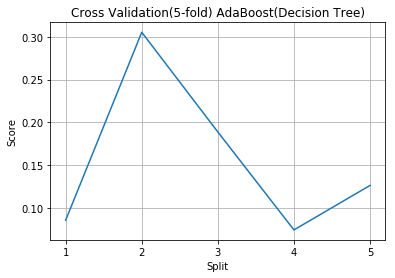

In [22]:
plt.figure()
plt.plot(range(1,6), val_score)
plt.title('Cross Validation(5-fold) AdaBoost(Decision Tree)')
plt.xlabel('Split')
plt.ylabel('Score')
plt.xticks(range(1,6))
plt.grid(True)
plt.show()

In [27]:
from joblib import dump, load
dump(ada_boost_dec_tree, 'adaBoost_reason.joblib')

['adaBoost_reason.joblib']

## AdaBoost Using Linear SVM Classifier

In [23]:
ada_boost_svm = AdaBoostClassifier(LinearSVC(), algorithm='SAMME')
ada_boost_svm.fit(X_train, y_train)
y_predicted = ada_boost_svm.predict(X_test)
print('Accuracy: ' + str(np.mean(y_test==y_predicted)))
# Accuracy: 0.40614192258

Accuracy: 0.40526688612


In [24]:
print(classification_report(y_test,y_predicted))

             precision    recall  f1-score   support

          0       0.36      0.20      0.25      5916
          1       0.39      0.52      0.45      6116
          2       0.35      0.24      0.29      5915
          3       0.47      0.65      0.54      6052

avg / total       0.39      0.41      0.38     23999



In [25]:
y_train_pred = ada_boost_svm.predict(X_train)
print('Train Accuracy: ', np.mean(y_train ==y_train_pred))

Train Accuracy:  0.403860921121


## AdaBoost Using Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
ada_boost_log_reg = AdaBoostClassifier(LogisticRegression())
ada_boost_log_reg.fit(X_train, y_train)
y_predicted = ada_boost_log_reg.predict(X_test)
print('Accuracy: ' + str(np.mean(y_test==y_predicted)))
# Accuracy: 0.391099629151

Accuracy: 0.395224801033


In [15]:
print(classification_report(y_test,y_predicted))

             precision    recall  f1-score   support

          0       0.33      0.19      0.24      5916
          1       0.39      0.51      0.44      6116
          2       0.33      0.31      0.32      5915
          3       0.49      0.56      0.52      6052

avg / total       0.38      0.40      0.38     23999



In [17]:
print(confusion_matrix(y_test, y_predicted))

[[1150 2223 1288 1255]
 [1043 3121 1214  738]
 [ 786 1778 1811 1540]
 [ 508  959 1182 3403]]


## AdaBoost Using RBF SVM Classifier

In [18]:
# ada_boost_rbf = AdaBoostClassifier(SVC(kernel='rbf'), algorithm='SAMME')
# ada_boost_rbf.fit(X_train, y_train)
# y_predicted = ada_boost_rbf.predict(X_test)
# print('Accuracy: ' + str(np.mean(y_test==y_predicted)))

In [19]:
# print(classification_report(y_test,y_predicted))

In [20]:
# cross_val_score(ada_boost_rbf,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)